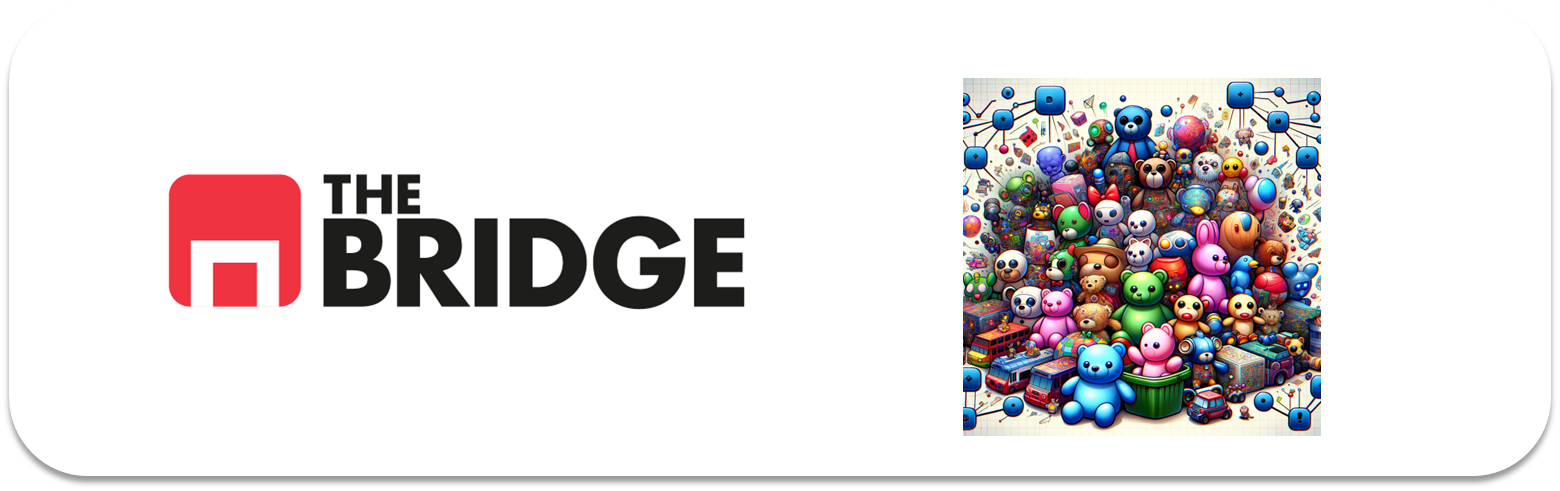

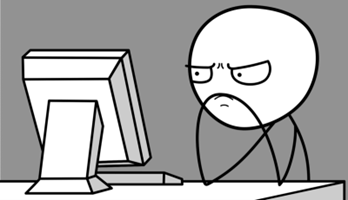

## PRACTICA OBLIGATORIA: DBSCAN y CLUSTERING JERARQUICO

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado aplicado a clustering jerárquico y no jerárquico. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

### Parte I. Modelado

#### Descripción del problema.

En una planta de experimentación con nuevas bebidas energéticas están trabajando con diferentes mezclas de componentes para obtener posibles variedades de su producto estrella "NonstopU". El problema es que la fabricación de cada "prototipo" conlleva demasiado tiempo y las pruebas de sabores y de propiedades "non-stop" antisueño y antifatiga son costosas.  

En ese sentido quieren construir algún sistema de segmentación previa de mezclas sin probarlas solo indicando las cantidades de cada componente de la bebida. Tienen datos pero desgraciadamente de mezclas anteriores con diferentes medidas pero que por temas presupuestarios y de prioridad no se hicieron test con usuarios y potenciales clientes, es decir no tienen un target de capacidad antifatiga o de preferncia del usuario que puedas servirles para construir un clasificador clásico como han hecho otras veces.  

Han acudido a vosotros con la necesida de encontrar ese segmentador de posibles bebidas y con los datos de las mezclas no probadas anteriores por ver si vostros podéis ayudarles a encontrar algún tipo de segmentación que luego ello se encargarían de interpretar. No es requisito obligatorio pero les gustaría también poder establecer algún tipo de relación entre las segmentaciones (tipo cuales segmentos se "parecerían" más entre sí)

NOTA ORIENTATIVA: Los químicos no esperan que haya menos de 3 segmentos ni más de 5.  
NOTA OPERATIVA: El dataset con los datos que nos han dado los químicos está en "./data/empowering_drinks.csv"

**Se pide**: Construir al menos dos algoritmos de clustering (DBSCAN debe ser uno de ellos y el otro debería estar claro cual deberíamos usar dado el enunciado). Compararlos brevemente aunque sea meramente especulativo (¿Por qué es espculativo?)

**Se recomienda**: Visualizar las features dos a dos para escoger las mejores, no necesariamente hay que usar todas, ni tampoco quedarse en dos. Probar diferentes hiperparámetros en función de la nota orientativa y explicar porqué se han escogido los que finalmente se hayan escogido. 

Recuerda que el proceso es similar a lo que vimos en el otro tipo de aprendizaje:
1. Entender el problema
2. Cargar datos, visualizar.
3. MiniEDA: Selección de features
4. Tratamiento de Features.
5. Selección de modelos, selección de hiperparámetros
6. Entrenamiento, visualización de resultados.
7. Discusión de los mismos


In [6]:
df = pd.read_csv("./data/empowering_drinks.csv", sep='|')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Azúcares               153 non-null    float64
 1   Vitamínas del grupo B  153 non-null    float64
 2   Cafeína                153 non-null    float64
 3   Ácido Cítrico          153 non-null    float64
 4   Taurina                153 non-null    float64
dtypes: float64(5)
memory usage: 6.1 KB


In [7]:
df.sample(3)

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
84,-0.877801,-0.535569,0.221606,-1.454974,-1.257952
86,-0.655454,-0.608676,0.241685,0.605394,-1.063296
97,-0.346638,-0.316249,-0.270338,-0.824444,-0.760497


c:\Users\lucas\anaconda3\envs\GPU-TensorFlow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lucas\anaconda3\envs\GPU-TensorFlow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lucas\anaconda3\envs\GPU-TensorFlow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lucas\anaconda3\envs\GPU-TensorFlow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

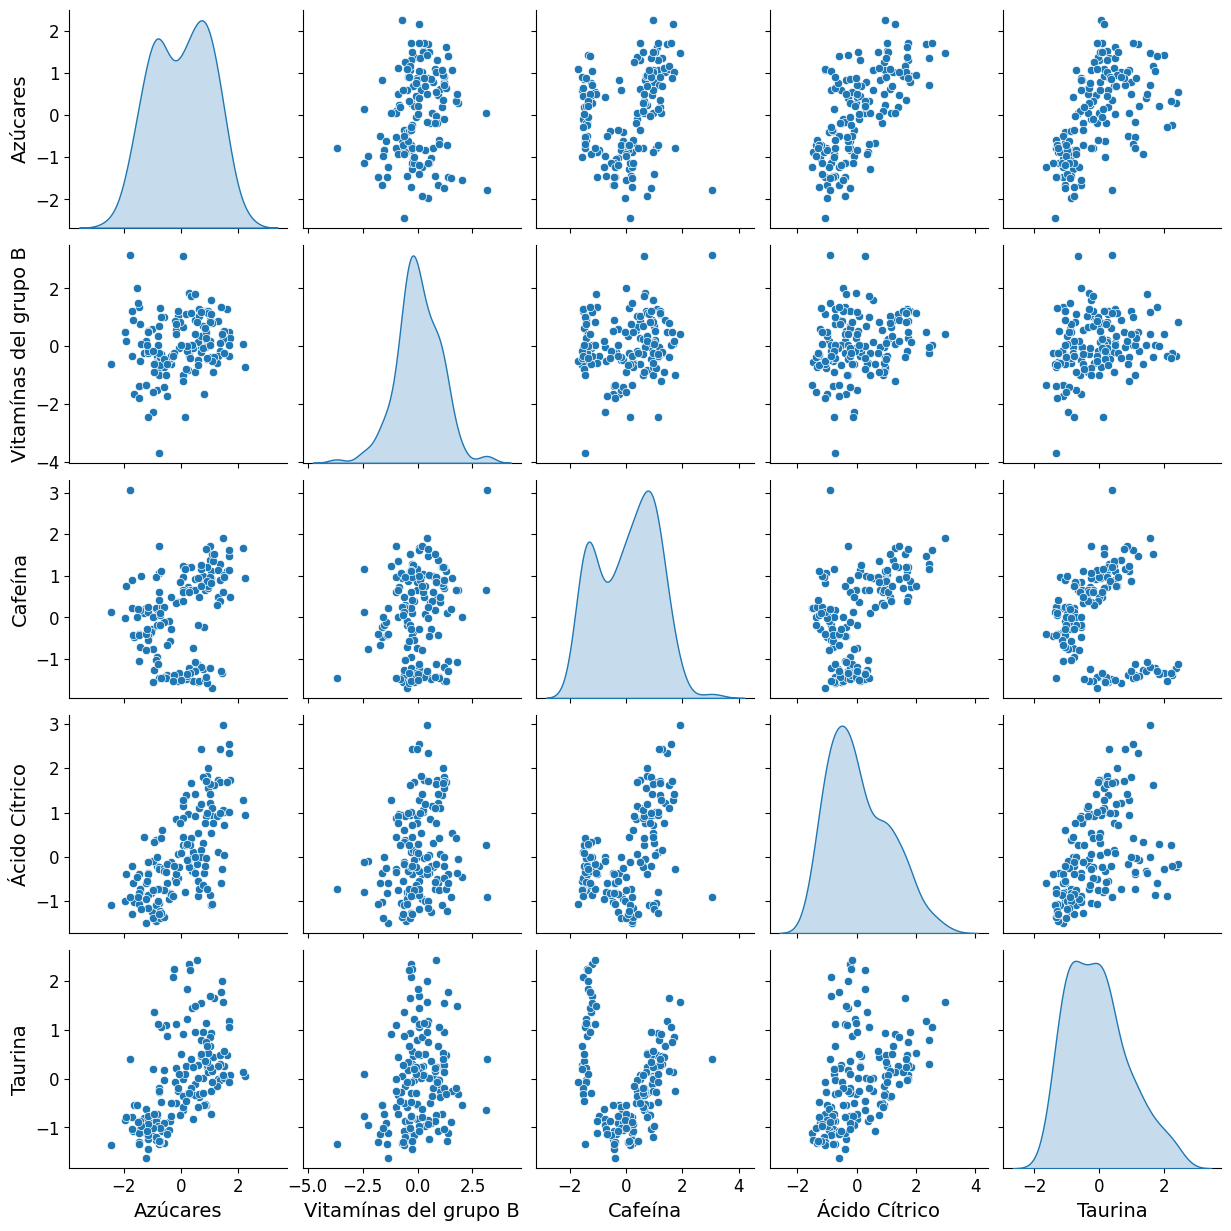

In [8]:
sns.pairplot(df, diag_kind='kde')
plt.show()

***Creación de 4 conjuntos de prueba: df_all (con todas las variables), df_scaled (con todas las variables escaladas), df_selected (que contiene solo las variables que parecen tener clústeres claros en el pairplot) y df_selected_scaled (igual que el anterior, pero escalado).***

In [9]:
df_all = df.copy()
df_selected = df.drop(columns=["Vitamínas del grupo B", "Ácido Cítrico"]).copy()


### Dendrograma

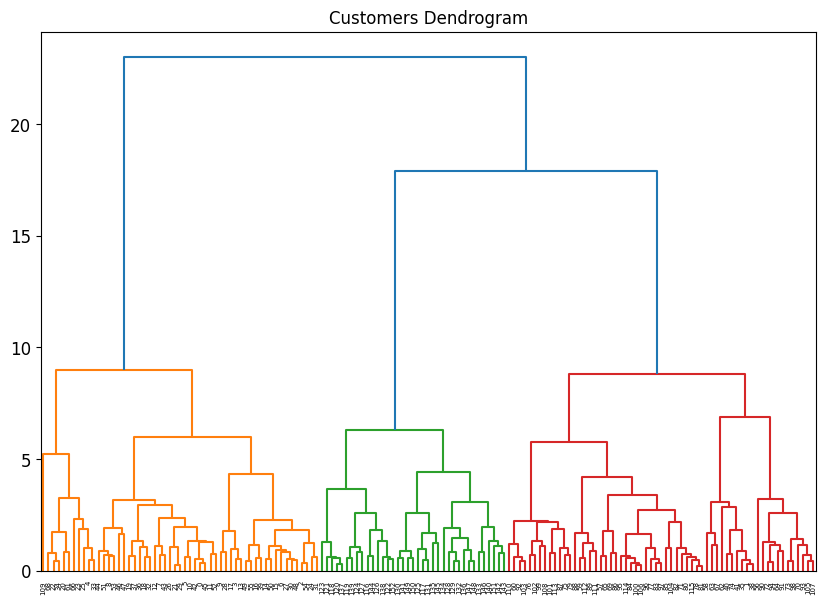

In [10]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

clusters = shc.linkage(df_all, 
            method='ward', # Este hiperparámetro y el siguiente tienen que ver con la distancia entre clústeres y los veremos un poco más adelante
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

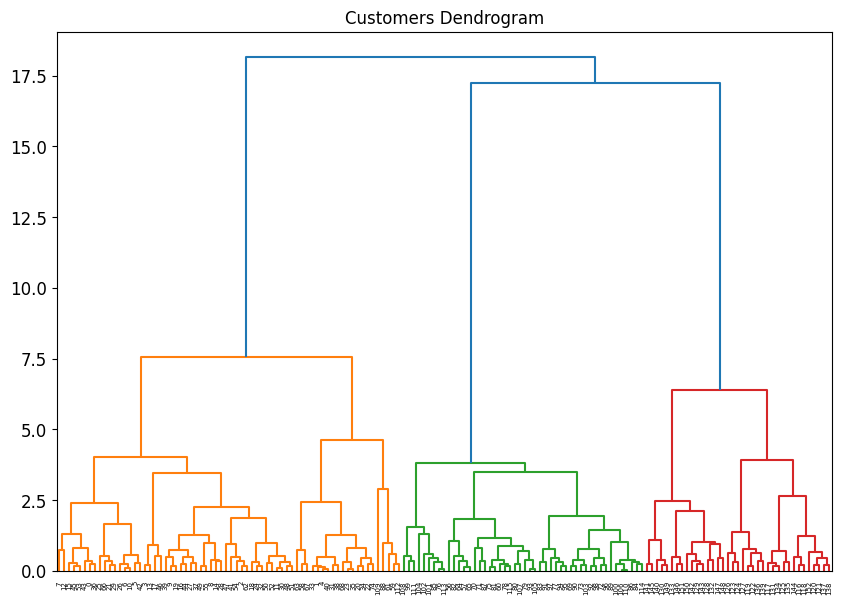

In [11]:
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

clusters = shc.linkage(df_selected, 
            method='ward', # Este hiperparámetro y el siguiente tienen que ver con la distancia entre clústeres y los veremos un poco más adelante
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

En los 4 conjuntos de prueba parece haber un rango de selección entre 10 y 15 que genera 3 clústeres.

### DBSCAN

In [26]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

lista_df = [df_all, df_selected]
nombres_df = ["df_all", "df_selected"]

for nome, df_escalado in zip(nombres_df, lista_df):
    mejor_eps = None
    mejor_n_clusters = 0
    mejor_etiquetas = None
    mejor_silhouette = -1

    for eps in np.linspace(0.001, 6.0, 100):
        dbscan = DBSCAN(eps=eps, min_samples=5)
        etiquetas = dbscan.fit_predict(df_escalado)

        clusters_validos = set(etiquetas) - {-1}
        n_clusters = len(clusters_validos)

        if 3 <= n_clusters <= 5:
            if n_clusters > 1:
                sil_score = silhouette_score(df_escalado, etiquetas)
            else:
                sil_score = -1

            if sil_score > mejor_silhouette:
                mejor_eps = eps
                mejor_n_clusters = n_clusters
                mejor_etiquetas = etiquetas
                mejor_silhouette = sil_score

    print(f"\nResultados para {nome}:")
    if mejor_eps is not None:
        print(f"Mejor eps={mejor_eps} -> {mejor_n_clusters} clústeres encontrados (sin ruido)")
        print(f"Índice de Silueta: {mejor_silhouette:.4f}")
    else:
        print("Ningún eps en el intervalo encontró entre 3 y 5 clústeres sin ruido")



Resultados para df_all:
Mejor eps=1.031131313131313 -> 3 clústeres encontrados (sin ruido)
Índice de Silueta: 0.3346

Resultados para df_selected:
Mejor eps=0.6675555555555556 -> 3 clústeres encontrados (sin ruido)
Índice de Silueta: 0.4297


In [13]:
# Mejor resultado de Silueta ==> df_selected, eps=0.6

In [14]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

In [36]:
dbscan = DBSCAN(eps=0.6675555555555556,
                min_samples=5)
dbscan.fit(df_selected)

DBSCAN(eps=0.6675555555555556)

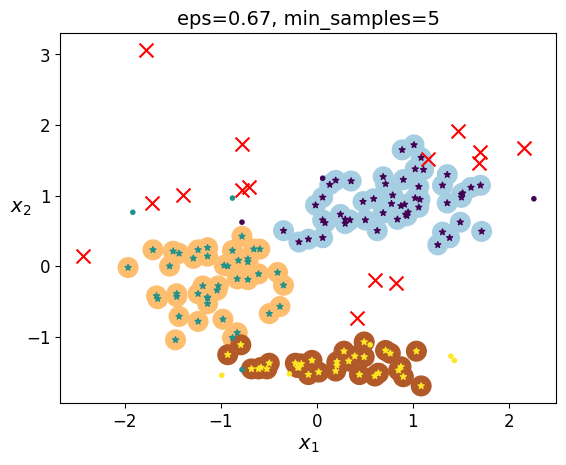

In [37]:
X = df_selected.to_numpy()

plot_dbscan(dbscan, X, size=200)


### Parte II. Nuevos experimentos

Los químicos están muy esperanzados con los modelos que les habéis mostrado y os pasan una lista de nuevos experimentos para que los clasifiquéis. Emplea uno de los modelos construidos, el que te resulte más sencillo, para segmentar los nuevos experimentos que puedes encontrar en "./data/new_experiments.csv"

In [30]:
df_new = pd.read_csv("./data/new_experiments.csv", sep="|")
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Azúcares               6 non-null      float64
 1   Vitamínas del grupo B  6 non-null      float64
 2   Cafeína                6 non-null      float64
 3   Ácido Cítrico          6 non-null      float64
 4   Taurina                6 non-null      float64
dtypes: float64(5)
memory usage: 368.0 bytes


In [31]:
df_new_selected = df_new.drop(columns=["Vitamínas del grupo B", "Ácido Cítrico"]).copy()

In [ ]:
# No se puede predecir con modelos no supervisados, hay que crear las etiquetas y utilizar un supervisado (knn)

### Parte III. EXTRA (Voluntario): 6 meses después...

La unidad de experimentación recibió un presupuesto adicional gracias a los modelos que les proporcionastes e hizo pruebas con cliente y obtuvo resultados como para clasificar cada bebida en terminos de "energización" en tres niveles (1, media; 2, media-alta, 3, alta). El resultado de los mismos está en el fichero adecuado en el directorio data y alineado con los experimentos iniciales y al final con los nuevos experimentos de la parte anterior.

Evalua la segmentación de los modelos creados en la primera parte.